Correlation between news and stock movement

In [ ]:
import pandas as pd
import os
import yfinance as yf
import pynance as pn
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import pytextrank
import nltk


In [46]:
df= pd.read_csv(r"E:\Predicting Price Moves with News Sentiment week1\Predicting-Price-Moves-with-News-Sentiment-week1\data\raw_analyst_ratings.csv",index_col = 0)

In [47]:
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [48]:
df["date"]

0          2020-06-05 10:30:54-04:00
1          2020-06-03 10:45:20-04:00
2          2020-05-26 04:30:07-04:00
3          2020-05-22 12:45:06-04:00
4          2020-05-22 11:38:59-04:00
                     ...            
1413844          2011-08-29 00:00:00
1413845          2011-06-22 00:00:00
1413846          2011-06-21 00:00:00
1413847          2011-06-21 00:00:00
1413848          2011-05-12 00:00:00
Name: date, Length: 1407328, dtype: object

In [49]:
df["date"] = pd.to_datetime(df["date"], format= "ISO8601",utc=True) # convert the dtae column 
df["date"]


0         2020-06-05 14:30:54+00:00
1         2020-06-03 14:45:20+00:00
2         2020-05-26 08:30:07+00:00
3         2020-05-22 16:45:06+00:00
4         2020-05-22 15:38:59+00:00
                     ...           
1413844   2011-08-29 04:00:00+00:00
1413845   2011-06-22 04:00:00+00:00
1413846   2011-06-21 04:00:00+00:00
1413847   2011-06-21 04:00:00+00:00
1413848   2011-05-12 04:00:00+00:00
Name: date, Length: 1407328, dtype: datetime64[ns, UTC]

In [50]:
duplicate_count = df.duplicated().sum() # duplicates row check
print(duplicate_count)

1


In [51]:
if duplicate_count > 0:   # duplicate row delete
    df.drop_duplicates(inplace=True)

In [52]:
df["headline"] = df["headline"].astype("string") #convert data type obj to string the headline column 

In [53]:
headlines = df.head(100)

In [56]:
headlines["TextBlob_Sentiment"] = headlines["headline"].apply(lambda x:TextBlob(str(x)).sentiment.polarity)

def categorize_sentiment(polarity):
    if polarity >= 0.05:
        return "Positive"
    elif polarity <= -0.05:
        return "Negative"
    else:
        return "Neutral"

headlines["Sentiment_Category"] = headlines["TextBlob_Sentiment"].apply(categorize_sentiment)

print(headlines)

                                             headline  \
0             Stocks That Hit 52-Week Highs On Friday   
1          Stocks That Hit 52-Week Highs On Wednesday   
2                       71 Biggest Movers From Friday   
3        46 Stocks Moving In Friday's Mid-Day Session   
4   B of A Securities Maintains Neutral on Agilent...   
..                                                ...   
95  Barclays Maintains Equal-Weight on Agilent Tec...   
96  Shares of several healthcare companies are tra...   
97  Shares of several healthcare companies are tra...   
98  Shares of several healthcare companies are tra...   
99  Agilent Collaborates On Study Of Performance-E...   

                                                  url          publisher  \
0   https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1   https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2   https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3   https:/

C:\Users\Abas\AppData\Local\Temp\ipykernel_29932\14372116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headlines["TextBlob_Sentiment"] = headlines["headline"].apply(lambda x:TextBlob(str(x)).sentiment.polarity)
C:\Users\Abas\AppData\Local\Temp\ipykernel_29932\14372116.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headlines["Sentiment_Category"] = headlines["TextBlob_Sentiment"].apply(categorize_sentiment)


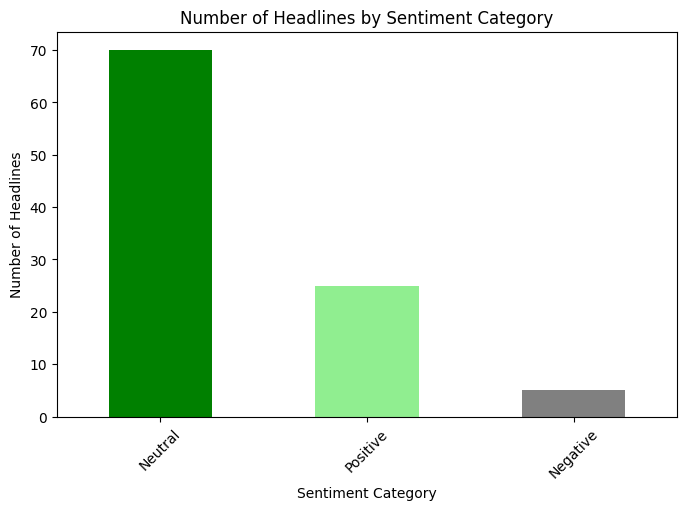

In [57]:
sentiment_counts = headlines['Sentiment_Category'].value_counts()

plt.figure(figsize=(8,5))
sentiment_counts.plot(kind='bar', color=['green','lightgreen','gray','orange','red'])
plt.title("Number of Headlines by Sentiment Category")
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Headlines")
plt.xticks(rotation=45)
plt.show()

In [105]:

df["date"] = pd.to_datetime(df["date"], format= "ISO8601",utc=True) # convert the dtae column 
headlines['TextBlob_Sentiment'] = headlines['headline'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

daily_sentiment = headlines.groupby('date')['TextBlob_Sentiment'].mean().reset_index()
daily_sentiment = daily_sentiment.rename(columns={"date": "Date"})


start_date ="2019-09-03" 
end_date   ="2020-06-05"

ticker = 'AAPL'

stock_data = yf.download(ticker, start=start_date, end=end_date)
stock_data = stock_data.reset_index()

stock_data["Date"] = pd.to_datetime(stock_data["Date"],format= "ISO8601",utc=True)
stock_data.columns = stock_data.columns.get_level_values(0)

stock_data['Daily_Return'] = stock_data['Close'].pct_change() * 100
daily_sentiment['Date'] = pd.to_datetime(daily_sentiment['Date'])

merged_data = pd.merge(stock_data, daily_sentiment, on='Date', how='inner')


C:\Users\Abas\AppData\Local\Temp\ipykernel_29932\1368279005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headlines['TextBlob_Sentiment'] = headlines['headline'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
C:\Users\Abas\AppData\Local\Temp\ipykernel_29932\1368279005.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


In [106]:
merged_data['Sentiment_Shifted'] = merged_data['TextBlob_Sentiment'].shift(1)
corr_same_day = merged_data['Daily_Return'].corr(merged_data['TextBlob_Sentiment'])
corr_next_day = merged_data['Daily_Return'].corr(merged_data['Sentiment_Shifted'])

print(f"Correlation (same day): {corr_same_day:.3f}")
print(f"Correlation (next day): {corr_next_day:.3f}")

Correlation (same day): nan
Correlation (next day): nan


e:\Predicting Price Moves with News Sentiment week1\Predicting-Price-Moves-with-News-Sentiment-week1\.venv\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
e:\Predicting Price Moves with News Sentiment week1\Predicting-Price-Moves-with-News-Sentiment-week1\.venv\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


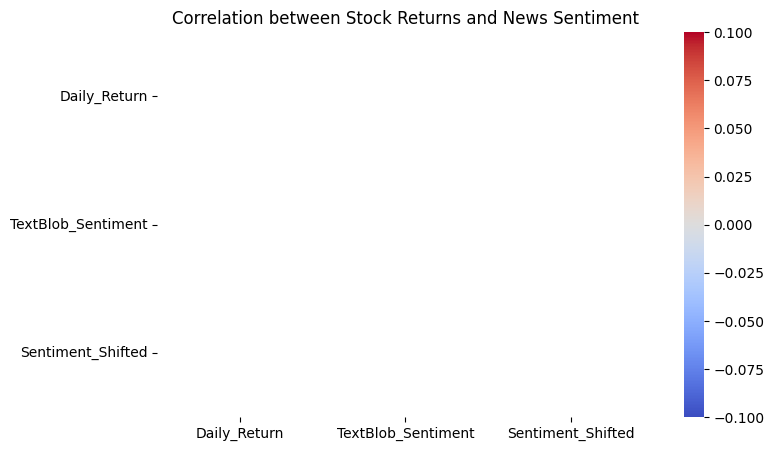

In [107]:
plt.figure(figsize=(8,5))
sns.heatmap(merged_data[['Daily_Return', 'TextBlob_Sentiment', 'Sentiment_Shifted']].corr(),annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Stock Returns and News Sentiment")
plt.show()

In [ ]:
ticker = "AAPL"
start_date = "2019-09-03"
end_date = "2020-06-05"

stock_data = yf.download(ticker, start=start_date, end=end_date)
stock_data = stock_data.reset_index()
stock_data["Date"] = pd.to_datetime(stock_data["Date"]).dt.tz_localize(None)
stock_data["Daily_Return"] = stock_data["Close"].pct_change() * 100
print(stock_data[["Date", "Close", "Daily_Return"]].head(10))


C:\Users\Abas\AppData\Local\Temp\ipykernel_29932\3829011384.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Price        Date      Close Daily_Return
Ticker                  AAPL             
0      2019-09-03  49.482609          NaN
1      2019-09-04  50.322147     1.696634
2      2019-09-05  51.306030     1.955169
3      2019-09-06  51.301220    -0.009376
4      2019-09-09  51.520126     0.426708
5      2019-09-10  52.128746     1.181324
6      2019-09-11  53.786186     3.179513
7      2019-09-12  53.665894    -0.223650
8      2019-09-13  52.621876    -1.945403
9      2019-09-16  52.898525     0.525731


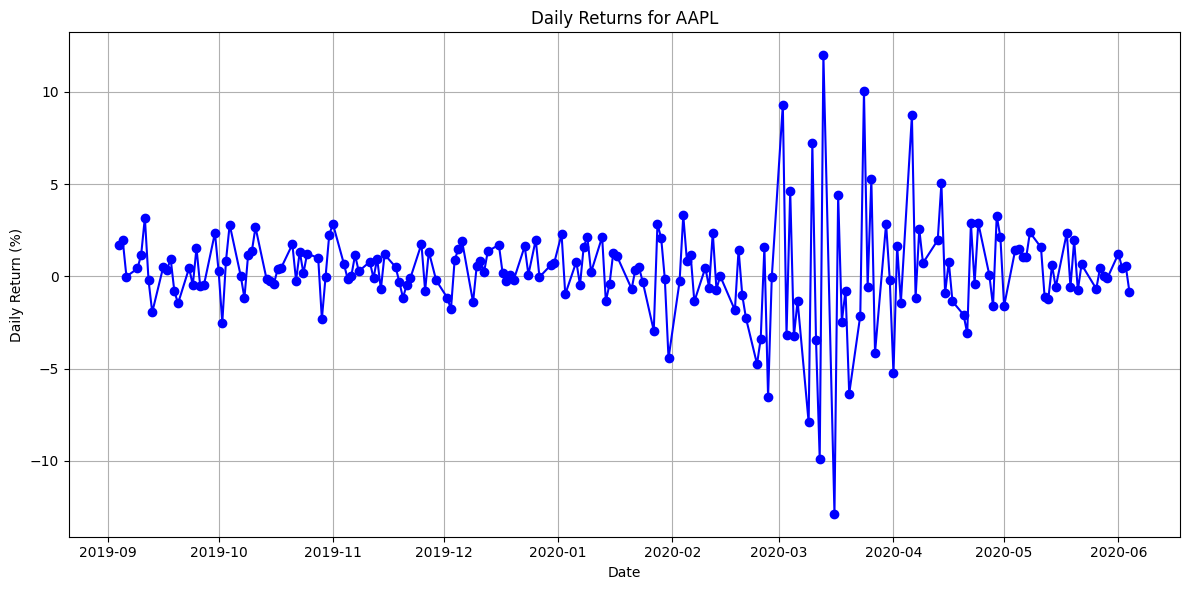

In [109]:
plt.figure(figsize=(12,6))
plt.plot(stock_data['Date'], stock_data['Daily_Return'], marker='o', linestyle='-', color='blue')
plt.title(f'Daily Returns for {ticker}')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.grid(True)
plt.tight_layout()
plt.show()